## Environment Setup

In [1]:
!git clone https://github.com/gdtan02/crypto-trading-bot.git

fatal: destination path 'crypto-trading-bot' already exists and is not an empty directory.


In [2]:
cd /content/crypto-trading-bot

/content/crypto-trading-bot


In [3]:
# If packages are not installed
!pip install -r requirements.txt

In [4]:
!pip install ydata-profiling
!pip install autoviz

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from datetime import datetime
from pathlib import Path
from ydata_profiling import ProfileReport
from IPython.display import display

from autoviz.AutoViz_Class import AutoViz_Class

# Suppress the warning
warnings.filterwarnings('ignore')

# Set display config
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [7]:
from config.paths import RAW_DATA_DIR

MARKET_DATA_PATH = RAW_DATA_DIR / "long-btc-market-data.csv"
NETWORK_DATA_PATH = RAW_DATA_DIR / "long-btc-network-data.csv"
MARKET_INDICATOR_PATH = RAW_DATA_DIR / "long-btc-market-indicator.csv"
NETWORK_INDICATOR_PATH = RAW_DATA_DIR / "long-btc-network-indicator.csv"
FLOW_INDICATOR_PATH = RAW_DATA_DIR / "long-btc-flow-indicator.csv"
EXCHANGE_FLOWS_PATH = RAW_DATA_DIR / "long-btc-exchange-flows.csv"
MINER_FLOWS_PATH = RAW_DATA_DIR / "long-btc-miner-flows.csv"

# Exchange Flows

## Definition

1. **reserve**: The total amount of coins held in the exchange addresses.

2. **reserve_usd**: The total amount of coins (in USD) held in exchange addresses.

3. **netflow_total**: The total diffference between BTC flowing into and out of the exchange (Inflow - Outflow).

4. **inflow_mean**: The mean amount of BTC per transaction sent to the exchange.

5. **inflow_mean_ma7**: The 7 days moving average of mean BTC inflow to the exchange.

6. **inflow_top10**: The total BTC amount of the top 10 transactions inflow to the exchange.

7. **inflow_total**: The total amount of BTC transferred to the exchange.

8. **outflow_mean**: The mean amount of BTC per transaction sent from the exchange.

9. **outflow_mean_ma7**: The 7 days moving average of mean BTC outflow from the exchange.

10. **outflow_top10**:
The total BTC amount of the top 10 transactions outflow from the exchange

11. **outflow_total**: The total amount of BTC transferred from the exchange.

12. **transactions_count_inflow**: The total number of deposits transactions to the exchange.

13. **transactions_count_outflow**:
The total number of withdrawals from the exchange

14. **addresses_count_inflow**:
The number of the token addresses making inflow transactions to the exchange

15. **addresses_count_outflow**: The number of the token addresses making outflow transactions from the exchange.


## Interpretation

### 1. Exchange Reserve

**Exchange Reserve** is a key metric in determining the availability of coins for potential sale within the market and provide insights into market dynamics.

An **upward trend in exchange reserves typically suggests an increasing selling pressure**, indicating that more coins from the exchange's holdings are potentially entering the market for sale (market participants are opting to keep a large portion of their holdings within the exchange, suggesting a readiness to sell).

Conversely, a **downward trend in exchange reserves points towards decreasing selling pressure**, implying that fewer coins are available for sale (market participants are more inclined to withdraw their coins from the exchange for purposes other than immediate selling).

#### Examining Trends

**Increasing Trend** --> Decrease in currency scarcity --> **Bearish**

**Decreasing Trend** --> Increasing scarcity of coins --> **Bullish**

### 2. Exchange In/Outflow and Netflow

In [11]:
print(RAW_DATA_DIR)

/content/crypto-trading-bot/data/raw


In [28]:
# Read the CSV file
try:
    exchange_flows_data = pd.read_csv("/content/long-btc-exchange-flows.csv")
    exchange_flows_data = exchange_flows_data.set_index('date')
    if exchange_flows_data is not None:
        print("File loaded successfully")
except IOError as e:
    print("File Not Found")

File loaded successfully


In [29]:
exchange_flows_data.head()

,reserve,reserve_usd,netflow_total,inflow_mean,inflow_mean_ma7,inflow_top10,inflow_total,outflow_mean,outflow_mean_ma7,outflow_top10,outflow_total,transactions_count_inflow,transactions_count_outflow,addresses_count_inflow,addresses_count_outflow
date,,,,,,,,,,,,,,,
2012-04-02,0.02,0.09948,0.02,0.02,NaN,0.02,0.02,0.0,NaN,0.0,0.0,1,0,1,0
2012-04-03,0.02,0.09948,0.00,0.00,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0,0,0,0
2012-04-04,0.02,0.09948,0.00,0.00,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0,0,0,0
2012-04-05,0.02,0.09948,0.00,0.00,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0,0,0,0
2012-04-06,0.02,0.09948,0.00,0.00,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0,0,0,0


In [30]:
exchange_flows_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4735 entries, 2012-04-02 to 2025-03-19
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   reserve                     4735 non-null   float64
 1   reserve_usd                 4735 non-null   float64
 2   netflow_total               4735 non-null   float64
 3   inflow_mean                 4735 non-null   float64
 4   inflow_mean_ma7             4729 non-null   float64
 5   inflow_top10                4735 non-null   float64
 6   inflow_total                4735 non-null   float64
 7   outflow_mean                4735 non-null   float64
 8   outflow_mean_ma7            4729 non-null   float64
 9   outflow_top10               4735 non-null   float64
 10  outflow_total               4735 non-null   float64
 11  transactions_count_inflow   4735 non-null   int64  
 12  transactions_count_outflow  4735 non-null   int64  
 13  addresses_count_inflow 

In [21]:
profile = ProfileReport(exchange_flows_data, title="Exchange Flows Report")
profile.to_file("exchange_flows_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 27.05it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Number of features: 15


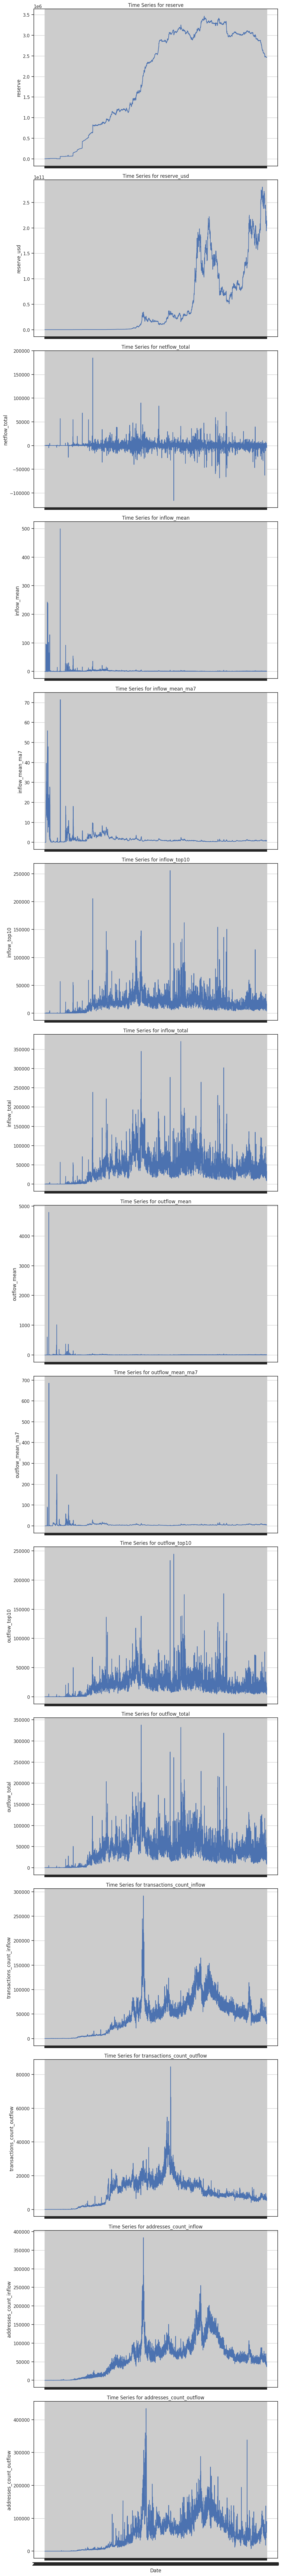

In [32]:
%matplotlib inline

num_features = len(exchange_flows_data.columns)
print("Number of features:", num_features)

fig, axes = plt.subplots(num_features, 1, figsize=(10,6*num_features), sharex=True)

for i, feature in enumerate(exchange_flows_data.columns):
  axes[i].plot(exchange_flows_data.index, exchange_flows_data[feature])
  axes[i].set_title(f"Time Series for {feature}")
  axes[i].set_ylabel(feature)
  axes[i].grid(True)

plt.xlabel("Date")
plt.tight_layout()
plt.show()